In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Dataset: VHM Historical Data

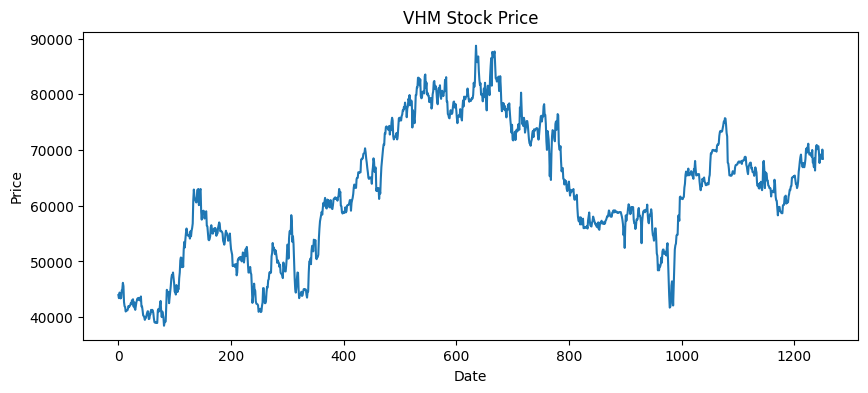

In [74]:
data = pd.read_csv('./Datasets/1 - VHM Historical Data.csv')
data = data.sort_index(ascending=False)
plt.figure(figsize=(10, 4))
plt.plot(data['Price'])
plt.title('VHM Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

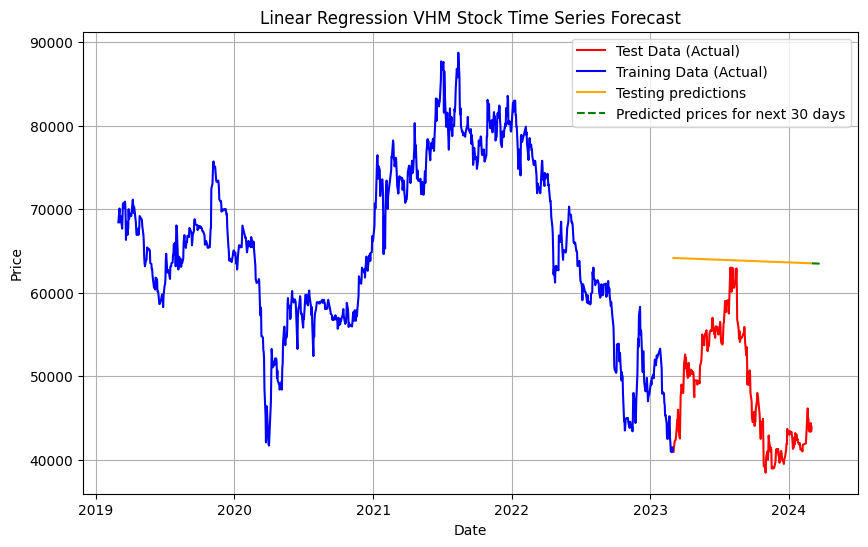

In [75]:
data['Date'] = pd.to_datetime(data['Date'])
train_dates= pd.to_datetime(data['Date'])

train_data = data[:round(len(data)*80/100)]
test_data = data[round(len(data)*80/100):]

x = data['Date'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y = data['Price'].values

train_size = round(len(x) * 0.8)
X_train, X_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Price'], linestyle='-', color='r', label='Test Data (Actual)')
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', color='b', label='Training Data (Actual)')
plt.plot(test_data['Date'], y_test_pred, color='orange', label='Testing predictions')

# Predict prices for the next 30 days
last_date = data['Date'].iloc[-1]
next_30_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
plt.plot(next_30_days, y_next_30_days, linestyle='--', color='g', label='Predicted prices for next 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression VHM Stock Time Series Forecast')
plt.legend()
plt.grid(True)
plt.show()


## Dataset: NVL Historical Data

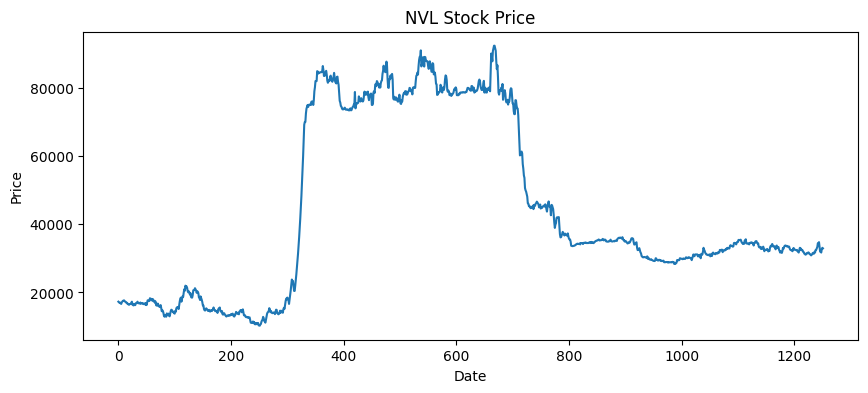

In [76]:
data = pd.read_csv('./Datasets/2 - NVL Historical Data.csv')
data = data.sort_index(ascending=False)
plt.figure(figsize=(10, 4))
plt.plot(data['Price'])
plt.title('NVL Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

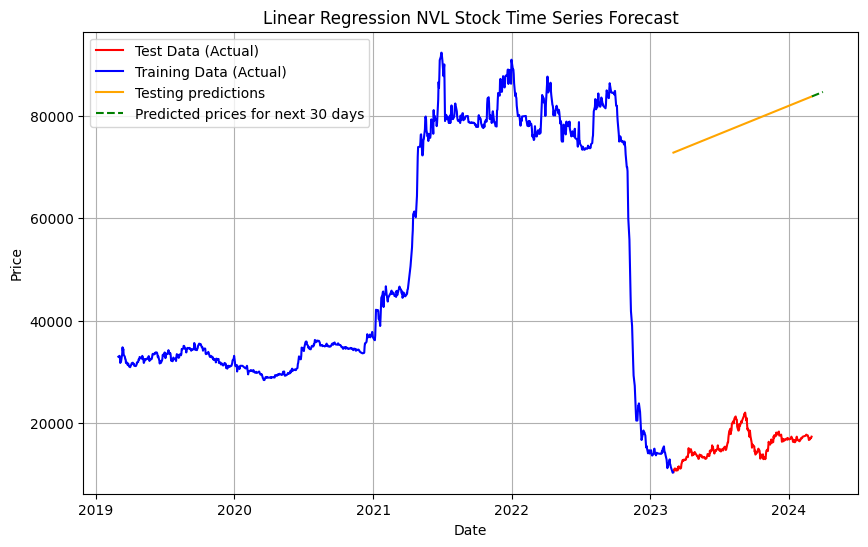

In [77]:
data['Date'] = pd.to_datetime(data['Date'])
train_dates= pd.to_datetime(data['Date'])

train_data = data[:round(len(data)*80/100)]
test_data = data[round(len(data)*80/100):]

x = data['Date'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y = data['Price'].values

train_size = round(len(x) * 0.8)
X_train, X_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Price'], linestyle='-', color='r', label='Test Data (Actual)')
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', color='b', label='Training Data (Actual)')
plt.plot(test_data['Date'], y_test_pred, color='orange', label='Testing predictions')

# Predict prices for the next 30 days
last_date = data['Date'].iloc[-1]
next_30_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
plt.plot(next_30_days, y_next_30_days, linestyle='--', color='g', label='Predicted prices for next 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression NVL Stock Time Series Forecast')
plt.legend()
plt.grid(True)
plt.show()


## Dataset: NLG Historical Data

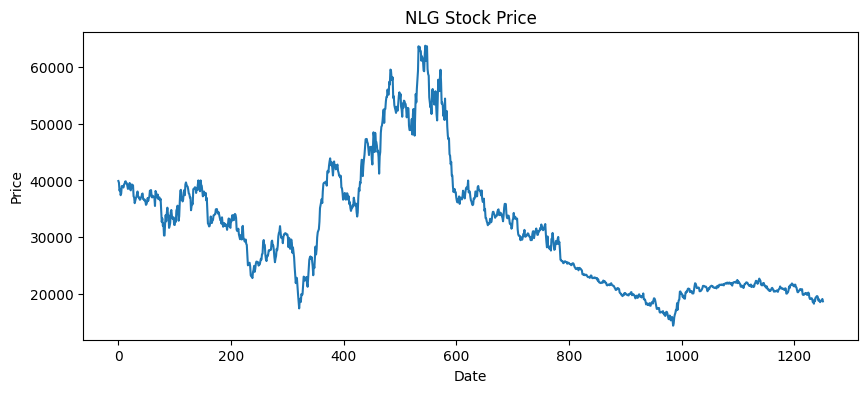

In [78]:
data = pd.read_csv('./Datasets/3 - NLG Historical Data.csv')
data = data.sort_index(ascending=False)
plt.figure(figsize=(10, 4))
plt.plot(data['Price'])
plt.title('NLG Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

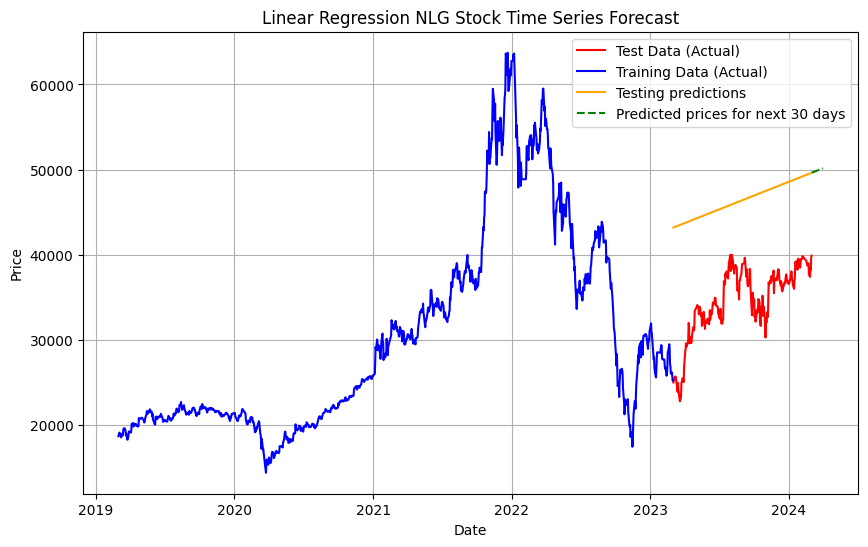

In [79]:
data['Date'] = pd.to_datetime(data['Date'])
train_dates= pd.to_datetime(data['Date'])

train_data = data[:round(len(data)*80/100)]
test_data = data[round(len(data)*80/100):]

x = data['Date'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y = data['Price'].values

train_size = round(len(x) * 0.8)
X_train, X_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Price'], linestyle='-', color='r', label='Test Data (Actual)')
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', color='b', label='Training Data (Actual)')
plt.plot(test_data['Date'], y_test_pred, color='orange', label='Testing predictions')

# Predict prices for the next 30 days
last_date = data['Date'].iloc[-1]
next_30_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
plt.plot(next_30_days, y_next_30_days, linestyle='--', color='g', label='Predicted prices for next 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression NLG Stock Time Series Forecast')
plt.legend()
plt.grid(True)
plt.show()
